In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
test = pd.read_pickle("X_test.pkl")
X = pd.read_pickle("X_train.pkl")
Y = pd.read_pickle("Y_train.pkl")

In [27]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [29]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metric

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758

[[4719    0]
 [  39    0]]


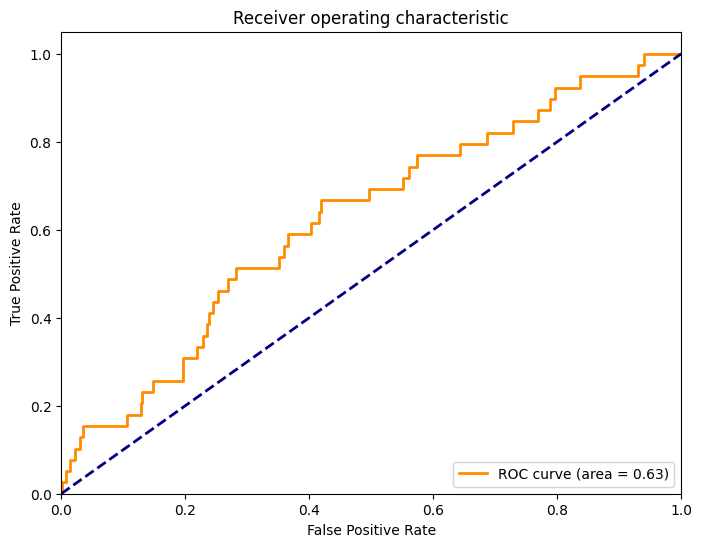

In [30]:
#Create Logistic Regression Model for Fraud Detection
log_reg = LogisticRegression(C=1e5, solver='lbfgs', max_iter=100)
log_reg.fit(X_train, Y_train)
preds = log_reg.predict(X_test)
preds_proba = log_reg.predict_proba(X_test)[:, 1]

#Print Classification Report
print(classification_report(Y_test, preds))
#Print Confusion Matrix
print(confusion_matrix(Y_test, preds))
#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds_proba)

In [31]:
#Import Isolation Forest
from sklearn.ensemble import IsolationForest
#Import Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

Isolation Forest: 208962
Accuracy Score :
0.9907524169819252
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758



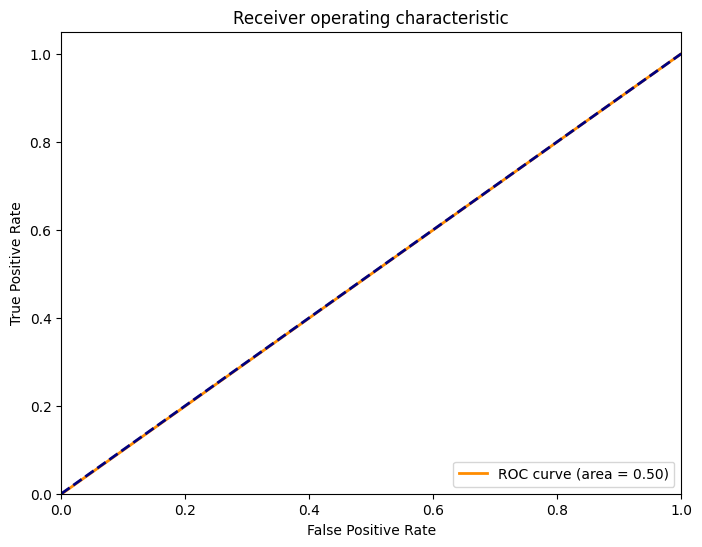

In [32]:
#Create Isolation Forest Model for Fraud Detection
iso_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.001), max_features=1.0)
iso_forest.fit(X_train)
preds = iso_forest.predict(X_test)
preds[preds == 1] = 0
preds[preds == -1] = 1
#Reshape T_Test to 1D Array
Y_test_r = Y_test.to_numpy()


n_errors = (preds != Y_test_r).sum()
print('{}: {}'.format('Isolation Forest', n_errors))
print("Accuracy Score :")
print(accuracy_score(Y_test, preds))
print("Classification Report :")
print(classification_report(Y_test, preds))


#Plot ROC_AUC Curve
plot_roc_curve(Y_test, preds)


In [33]:
#Predict probablity of fraud using models
preds_proba = log_reg.predict_proba(test)[:, 1]

#Predict score samples using Isolation Forest
preds_iso = iso_forest.score_samples(test)


In [34]:
#Print Pred_iso
print(preds_iso)




[-0.55700783 -0.58713126 -0.56610193 ... -0.56484331 -0.47942542
 -0.50782918]


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758

Confusion matrix:
 [[4716    3]
 [  39    0]]


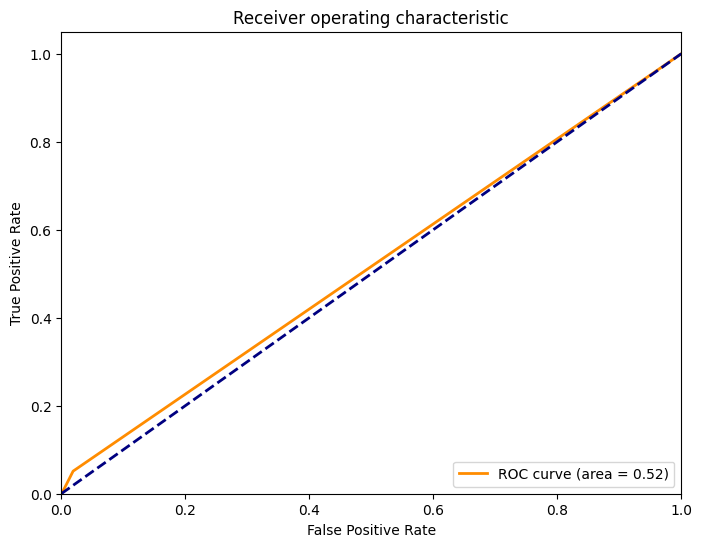

In [35]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

C:\Users\galve\AppData\Local\Temp\ipykernel_4944\2162731600.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.17      0.03      0.04        39

    accuracy                           0.99      4758
   macro avg       0.58      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4714    5]
 [  38    1]]


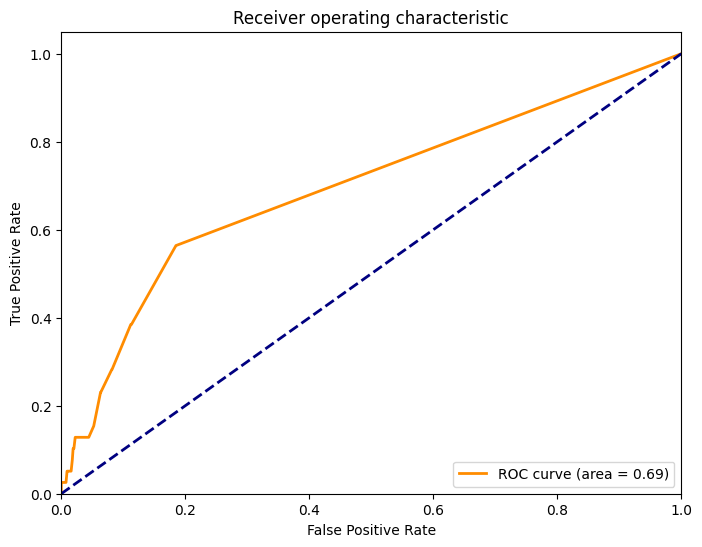

In [36]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[12:25:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.17      0.03      0.04        39

    accuracy                           0.99      4758
   macro avg       0.58      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4714    5]
 [  38    1]]


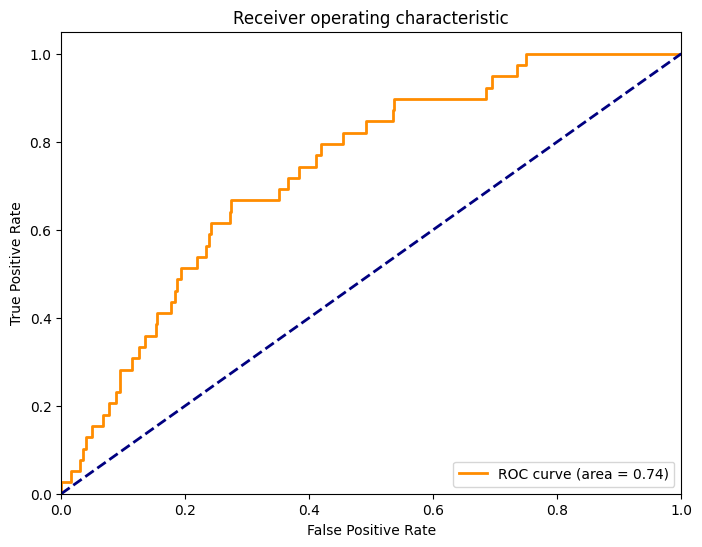

In [37]:
#Import XGBoost Classifier
from xgboost import XGBClassifier
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic')

xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


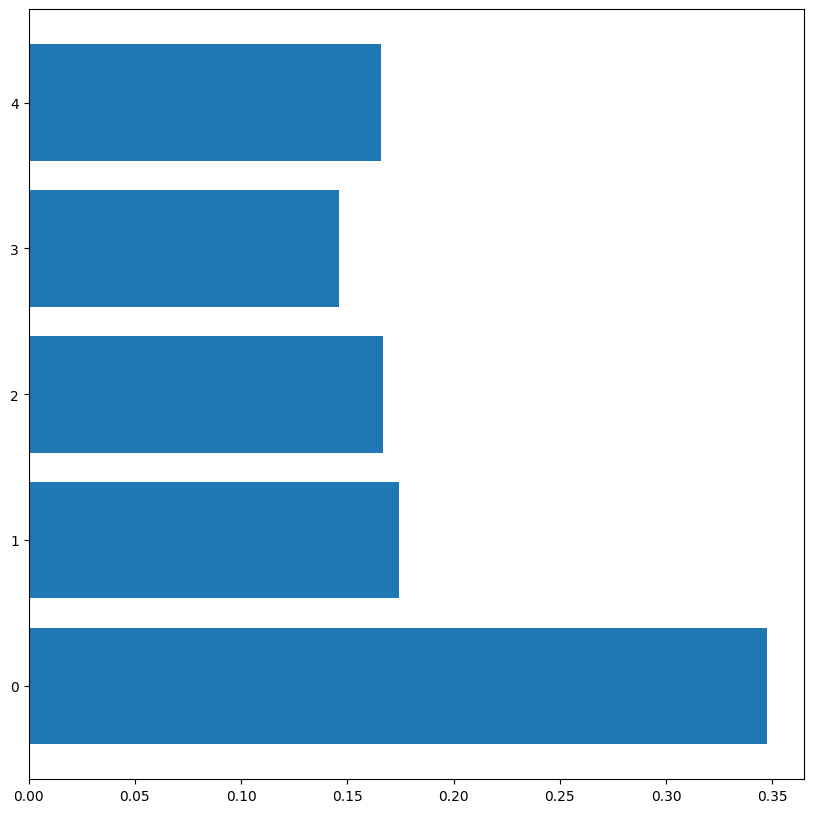

In [38]:
#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgb.feature_importances_)
plt.show()

In [39]:
import optuna

In [40]:
#Create a function to optimize the hyperparameters of xgb using optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
        'colsample_bylevel': trial.suggest_loguniform('colsample_bylevel', 0.4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1.0),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1e-3, 1.0),
        'n_jobs': -1
    }
    xgb = XGBClassifier(**param)
    xgb.fit(X_train, Y_train)
    preds = xgb.predict(X_test)
    score = accuracy_score(Y_test, preds)
    return score
    



In [41]:
#Create study object
study = optuna.create_study(direction='maximize')
#Optimize XGBoost Classifier
study.optimize(objective, n_trials=100)
#Print best parameters 
print(study.best_params)


[I 2022-12-11 12:25:51,105] A new study created in memory with name: no-name-e0a50cd6-180b-4408-9ea5-c2be95ee5e22
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was pas

[12:25:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:25:51,874] Trial 0 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 274, 'max_depth': 10, 'learning_rate': 0.07872379736523982, 'gamma': 0.007411444264736614, 'min_child_weight': 173, 'subsample': 0.7891053055319299, 'colsample_bytree': 0.43296996644077884, 'colsample_bylevel': 0.789130674078825, 'reg_alpha': 0.005462292539262881, 'reg_lambda': 0.5477524255212306, 'scale_pos_weight': 0.004654763753660258}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:25:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:25:54,148] Trial 1 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 797, 'max_depth': 10, 'learning_rate': 0.1162645276059475, 'gamma': 0.006011247522469141, 'min_child_weight': 13, 'subsample': 0.6717263324855794, 'colsample_bytree': 0.728003919011945, 'colsample_bylevel': 0.5019296094271194, 'reg_alpha': 0.16797814452353038, 'reg_lambda': 0.003793950140324051, 'scale_pos_weight': 0.004573582578478704}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:25:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:25:55,858] Trial 2 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 631, 'max_depth': 10, 'learning_rate': 0.024106848565137045, 'gamma': 0.0010433048457976306, 'min_child_weight': 44, 'subsample': 0.9136371310951414, 'colsample_bytree': 0.44235325859738156, 'colsample_bylevel': 0.5251405779704101, 'reg_alpha': 0.0010404467988471338, 'reg_lambda': 0.4215061635007728, 'scale_pos_weight': 0.07033936402451227}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-

[12:25:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:25:58,138] Trial 3 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 929, 'max_depth': 6, 'learning_rate': 0.06382789179175855, 'gamma': 0.6972939656382579, 'min_child_weight': 187, 'subsample': 0.991221330339196, 'colsample_bytree': 0.40622684930659253, 'colsample_bylevel': 0.9300779338842564, 'reg_alpha': 0.8433144239375073, 'reg_lambda': 0.07045470483643178, 'scale_pos_weight': 0.01780757627489568}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib

[12:25:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:00,299] Trial 4 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 849, 'max_depth': 3, 'learning_rate': 0.002588368785501157, 'gamma': 0.006073153469653958, 'min_child_weight': 300, 'subsample': 0.557321259243157, 'colsample_bytree': 0.44696759343006903, 'colsample_bylevel': 0.6355521814997734, 'reg_alpha': 0.13083503297009696, 'reg_lambda': 0.2463284684308945, 'scale_pos_weight': 0.06852753438935338}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:26:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:02,484] Trial 5 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 765, 'max_depth': 10, 'learning_rate': 0.08945012190114578, 'gamma': 0.07044555555712852, 'min_child_weight': 190, 'subsample': 0.5892977718149648, 'colsample_bytree': 0.9738395275477708, 'colsample_bylevel': 0.5143109798567084, 'reg_alpha': 0.007122505564917885, 'reg_lambda': 0.8936159006441303, 'scale_pos_weight': 0.0034127417578493943}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:05,042] Trial 6 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 937, 'max_depth': 7, 'learning_rate': 0.1227332304488771, 'gamma': 0.23052253887465396, 'min_child_weight': 217, 'subsample': 0.6745263388394342, 'colsample_bytree': 0.995698754315333, 'colsample_bylevel': 0.4056889629405041, 'reg_alpha': 0.7479902759579102, 'reg_lambda': 0.003381758848080722, 'scale_pos_weight': 0.29187120146611956}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib

[12:26:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:06,014] Trial 7 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 340, 'max_depth': 8, 'learning_rate': 0.001959048658495058, 'gamma': 0.030431848410115463, 'min_child_weight': 2, 'subsample': 0.7775077006698365, 'colsample_bytree': 0.5178954485852402, 'colsample_bylevel': 0.8909146023387868, 'reg_alpha': 0.007208368257071584, 'reg_lambda': 0.23386299995445792, 'scale_pos_weight': 0.21364909168895327}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:26:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:08,181] Trial 8 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 731, 'max_depth': 4, 'learning_rate': 0.06570974162379602, 'gamma': 0.031057167382364748, 'min_child_weight': 144, 'subsample': 0.8610203443222744, 'colsample_bytree': 0.8382073794459589, 'colsample_bylevel': 0.6518251498001457, 'reg_alpha': 0.03896182350388622, 'reg_lambda': 0.033121983038882696, 'scale_pos_weight': 0.012396843744245607}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:10,803] Trial 9 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 968, 'max_depth': 8, 'learning_rate': 0.14687856546115435, 'gamma': 0.1663310354049635, 'min_child_weight': 173, 'subsample': 0.9313992998752827, 'colsample_bytree': 0.8331877686755218, 'colsample_bylevel': 0.4636751778697495, 'reg_alpha': 0.0017591050546926495, 'reg_lambda': 0.2845907623348617, 'scale_pos_weight': 0.2405937999828827}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\li

[12:26:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:11,223] Trial 10 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 117, 'max_depth': 5, 'learning_rate': 0.766225957830407, 'gamma': 0.0057291983407507085, 'min_child_weight': 108, 'subsample': 0.40768478670127833, 'colsample_bytree': 0.5666684513501209, 'colsample_bylevel': 0.7780196690635666, 'reg_alpha': 0.0057158881060007435, 'reg_lambda': 0.008577931336123104, 'scale_pos_weight': 0.0012594764851182013}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\t

[12:26:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:12,587] Trial 11 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 426, 'max_depth': 9, 'learning_rate': 0.013890667033379638, 'gamma': 0.005881369604446364, 'min_child_weight': 91, 'subsample': 0.738245315581184, 'colsample_bytree': 0.6943553446038458, 'colsample_bylevel': 0.7557677078535757, 'reg_alpha': 0.06911390853979245, 'reg_lambda': 0.0010789289540216796, 'scale_pos_weight': 0.004557584331894916}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:13,164] Trial 12 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.5397675091195978, 'gamma': 0.0014510774106692918, 'min_child_weight': 252, 'subsample': 0.4637915241843387, 'colsample_bytree': 0.6649997255589155, 'colsample_bylevel': 0.7360928500985399, 'reg_alpha': 0.18507500993999362, 'reg_lambda': 0.010724870242274963, 'scale_pos_weight': 0.0010459819680200433}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:26:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:14,692] Trial 13 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 493, 'max_depth': 8, 'learning_rate': 0.008000934404679156, 'gamma': 0.01196304888482197, 'min_child_weight': 113, 'subsample': 0.6633604325353784, 'colsample_bytree': 0.566686873048186, 'colsample_bylevel': 0.5538313975454381, 'reg_alpha': 0.0174685426249055, 'reg_lambda': 0.0693459446503082, 'scale_pos_weight': 0.005366808822634492}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:26:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:15,610] Trial 14 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 299, 'max_depth': 9, 'learning_rate': 0.24520113656351583, 'gamma': 0.0024229933817153265, 'min_child_weight': 46, 'subsample': 0.7906877180841443, 'colsample_bytree': 0.7381649442376998, 'colsample_bylevel': 0.4247358617489768, 'reg_alpha': 0.2977807559224626, 'reg_lambda': 0.0016188788084791543, 'scale_pos_weight': 0.00930270628722862}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:19,848] Trial 15 finished with value: 0.9903320722992854 and parameters: {'n_estimators': 609, 'max_depth': 9, 'learning_rate': 0.33521946995781887, 'gamma': 0.010961467430656723, 'min_child_weight': 1, 'subsample': 0.5143507174026299, 'colsample_bytree': 0.5960079667800472, 'colsample_bylevel': 0.5800730183095467, 'reg_alpha': 0.018852348648282332, 'reg_lambda': 0.009040449570260112, 'scale_pos_weight': 0.999844166043518}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:26:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:20,870] Trial 16 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 307, 'max_depth': 7, 'learning_rate': 0.03190652720352426, 'gamma': 0.01706760023554042, 'min_child_weight': 252, 'subsample': 0.6733281193066428, 'colsample_bytree': 0.49774033076621904, 'colsample_bylevel': 0.9926749434904096, 'reg_alpha': 0.002547036638843303, 'reg_lambda': 0.0280896184828503, 'scale_pos_weight': 0.0027509885547707413}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:21,778] Trial 17 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 291, 'max_depth': 9, 'learning_rate': 0.2578166437175812, 'gamma': 0.00260028462587238, 'min_child_weight': 61, 'subsample': 0.7858424321155009, 'colsample_bytree': 0.7546586578625346, 'colsample_bylevel': 0.4068063344910374, 'reg_alpha': 0.3435936897042116, 'reg_lambda': 0.0011297926453258994, 'scale_pos_weight': 0.012531176062107586}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:26:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:22,522] Trial 18 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 220, 'max_depth': 6, 'learning_rate': 0.3211448677220408, 'gamma': 0.002466549509294623, 'min_child_weight': 146, 'subsample': 0.8451041947664965, 'colsample_bytree': 0.8558217317821746, 'colsample_bylevel': 0.8438012532435331, 'reg_alpha': 0.04385581929971114, 'reg_lambda': 0.08874511638471658, 'scale_pos_weight': 0.03273228534839481}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:26:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:23,952] Trial 19 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 415, 'max_depth': 7, 'learning_rate': 0.005351082538350723, 'gamma': 0.020150254899413852, 'min_child_weight': 249, 'subsample': 0.5930604335515899, 'colsample_bytree': 0.49355553035122607, 'colsample_bylevel': 0.9516961578621449, 'reg_alpha': 0.0029282086761770847, 'reg_lambda': 0.025881288883753788, 'scale_pos_weight': 0.0023981155282899523}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs

[12:26:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:24,688] Trial 20 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 234, 'max_depth': 9, 'learning_rate': 0.035557376283252916, 'gamma': 0.0023646895647980054, 'min_child_weight': 67, 'subsample': 0.7401920157109828, 'colsample_bytree': 0.6373136534100696, 'colsample_bylevel': 0.6913982717578883, 'reg_alpha': 0.01769707717285265, 'reg_lambda': 0.9017587850423189, 'scale_pos_weight': 0.026373521045991277}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:25,429] Trial 21 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 218, 'max_depth': 6, 'learning_rate': 0.267406310691033, 'gamma': 0.002924496785059455, 'min_child_weight': 142, 'subsample': 0.8220739850499738, 'colsample_bytree': 0.8368468163830509, 'colsample_bylevel': 0.8497801371708031, 'reg_alpha': 0.061344223423882176, 'reg_lambda': 0.11979579148338024, 'scale_pos_weight': 0.05216924585339396}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:26:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:26,888] Trial 22 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 432, 'max_depth': 5, 'learning_rate': 0.006846791681141261, 'gamma': 0.08260567848674248, 'min_child_weight': 224, 'subsample': 0.5909457609899401, 'colsample_bytree': 0.4994309648278254, 'colsample_bylevel': 0.8328104451177055, 'reg_alpha': 0.003411925230564351, 'reg_lambda': 0.025696903712992582, 'scale_pos_weight': 0.03404401795834812}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:28,299] Trial 23 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 427, 'max_depth': 8, 'learning_rate': 0.0011534587145724318, 'gamma': 0.015919661135934224, 'min_child_weight': 287, 'subsample': 0.7255081901469668, 'colsample_bytree': 0.4407864400682679, 'colsample_bylevel': 0.689047631519732, 'reg_alpha': 0.020618252251883254, 'reg_lambda': 0.996550345111068, 'scale_pos_weight': 0.0019004223785676609}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:28,645] Trial 24 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 101, 'max_depth': 5, 'learning_rate': 0.027669289543981797, 'gamma': 0.003584664675974258, 'min_child_weight': 121, 'subsample': 0.8414835175985692, 'colsample_bytree': 0.6297376964437756, 'colsample_bylevel': 0.701484928037259, 'reg_alpha': 0.011009184336802277, 'reg_lambda': 0.48036989044374867, 'scale_pos_weight': 0.09357159579541162}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:30,168] Trial 25 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 505, 'max_depth': 5, 'learning_rate': 0.010169410314787911, 'gamma': 0.10286242734482873, 'min_child_weight': 204, 'subsample': 0.607614884456605, 'colsample_bytree': 0.40280515821458607, 'colsample_bylevel': 0.7973246247065494, 'reg_alpha': 0.003927710547274255, 'reg_lambda': 0.12130336679272725, 'scale_pos_weight': 0.03513031569251223}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:31,285] Trial 26 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 429, 'max_depth': 4, 'learning_rate': 0.003658778749398443, 'gamma': 0.04904525568356955, 'min_child_weight': 300, 'subsample': 0.5145271819265806, 'colsample_bytree': 0.4528755361818049, 'colsample_bylevel': 0.5984292241181937, 'reg_alpha': 0.0014020178571141836, 'reg_lambda': 0.5726396637808521, 'scale_pos_weight': 0.001730050941718129}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:31,584] Trial 27 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.001291809979036087, 'gamma': 0.010931547746336017, 'min_child_weight': 120, 'subsample': 0.7198347151599949, 'colsample_bytree': 0.5378841361100074, 'colsample_bylevel': 0.6956997227448897, 'reg_alpha': 0.01187060579970418, 'reg_lambda': 0.5183781070299548, 'scale_pos_weight': 0.11130417324123427}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:33,068] Trial 28 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 561, 'max_depth': 5, 'learning_rate': 0.01532788787325458, 'gamma': 0.26504759209287543, 'min_child_weight': 170, 'subsample': 0.9004097878255399, 'colsample_bytree': 0.40392798029311483, 'colsample_bylevel': 0.7957684238470464, 'reg_alpha': 0.004356343907157051, 'reg_lambda': 0.15331759936607373, 'scale_pos_weight': 0.12488984851124568}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:35,087] Trial 29 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 679, 'max_depth': 3, 'learning_rate': 0.0038272273504349305, 'gamma': 0.061853797867897714, 'min_child_weight': 211, 'subsample': 0.5111783071537129, 'colsample_bytree': 0.47099671928344766, 'colsample_bylevel': 0.5992090609569137, 'reg_alpha': 0.0010424714513457896, 'reg_lambda': 0.1511861927825752, 'scale_pos_weight': 0.00612840759492947}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:26:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:35,615] Trial 30 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 166, 'max_depth': 4, 'learning_rate': 0.0012404765738437617, 'gamma': 0.040784730328460445, 'min_child_weight': 90, 'subsample': 0.4426276526406111, 'colsample_bytree': 0.539045993031372, 'colsample_bylevel': 0.6032771883213313, 'reg_alpha': 0.0019385226375301253, 'reg_lambda': 0.46900207789081927, 'scale_pos_weight': 0.4988312722733143}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:37,225] Trial 31 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 574, 'max_depth': 4, 'learning_rate': 0.002446279373097527, 'gamma': 0.479468046176481, 'min_child_weight': 167, 'subsample': 0.8962532288952549, 'colsample_bytree': 0.42391352173632413, 'colsample_bylevel': 0.7223487691282692, 'reg_alpha': 0.005254152854086077, 'reg_lambda': 0.5553180598772175, 'scale_pos_weight': 0.1335311012604683}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:26:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:39,103] Trial 32 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 693, 'max_depth': 3, 'learning_rate': 0.018413975148995818, 'gamma': 0.22543394707958905, 'min_child_weight': 166, 'subsample': 0.962745380723841, 'colsample_bytree': 0.4794402424272183, 'colsample_bylevel': 0.670158260601027, 'reg_alpha': 0.010517911944366727, 'reg_lambda': 0.22227915832397058, 'scale_pos_weight': 0.006750765186297611}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:41,306] Trial 33 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 618, 'max_depth': 3, 'learning_rate': 0.005109821670162058, 'gamma': 0.042323945384310516, 'min_child_weight': 192, 'subsample': 0.4305389441517654, 'colsample_bytree': 0.46055575778856417, 'colsample_bylevel': 0.6134117335239102, 'reg_alpha': 0.0011754277953508808, 'reg_lambda': 0.15362483814866454, 'scale_pos_weight': 0.7411524482719462}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-

[12:26:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:43,584] Trial 34 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 676, 'max_depth': 4, 'learning_rate': 0.00197136334656286, 'gamma': 0.7831811437783303, 'min_child_weight': 229, 'subsample': 0.45645634517161904, 'colsample_bytree': 0.4231832165803742, 'colsample_bylevel': 0.5480949113673911, 'reg_alpha': 0.0021353742778115873, 'reg_lambda': 0.6232024640215802, 'scale_pos_weight': 0.34833005825302565}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:44,386] Trial 35 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 238, 'max_depth': 10, 'learning_rate': 0.04641922169206918, 'gamma': 0.0012581313839167365, 'min_child_weight': 71, 'subsample': 0.6372853616002094, 'colsample_bytree': 0.7892463546195408, 'colsample_bylevel': 0.9474673265171267, 'reg_alpha': 0.06391564853280682, 'reg_lambda': 0.04783602651543031, 'scale_pos_weight': 0.019113337095506184}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:45,454] Trial 36 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 362, 'max_depth': 6, 'learning_rate': 0.044908446000878094, 'gamma': 0.0016654752012247804, 'min_child_weight': 136, 'subsample': 0.5516371154495786, 'colsample_bytree': 0.9271861108433663, 'colsample_bylevel': 0.8639984382359019, 'reg_alpha': 0.028188152759115827, 'reg_lambda': 0.016142533814033275, 'scale_pos_weight': 0.05208994801228464}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:26:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:46,222] Trial 37 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 239, 'max_depth': 6, 'learning_rate': 0.1627725729697502, 'gamma': 0.00386929197672084, 'min_child_weight': 39, 'subsample': 0.7569106824299725, 'colsample_bytree': 0.6488567873960469, 'colsample_bylevel': 0.8414193241624363, 'reg_alpha': 0.10263355175988659, 'reg_lambda': 0.3104871761268552, 'scale_pos_weight': 0.02227922636910152}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib

[12:26:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:47,300] Trial 38 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 373, 'max_depth': 7, 'learning_rate': 0.07562098157091589, 'gamma': 0.00800849732339388, 'min_child_weight': 280, 'subsample': 0.7055096506854314, 'colsample_bytree': 0.42633599960654595, 'colsample_bylevel': 0.9094397816840634, 'reg_alpha': 0.024046240878264142, 'reg_lambda': 0.9959029853255742, 'scale_pos_weight': 0.04754068581506776}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:48,680] Trial 39 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 497, 'max_depth': 8, 'learning_rate': 0.09793597567914814, 'gamma': 0.018597004745704852, 'min_child_weight': 232, 'subsample': 0.8290350349027997, 'colsample_bytree': 0.4427257495931576, 'colsample_bylevel': 0.8360882987476611, 'reg_alpha': 0.054215132556516075, 'reg_lambda': 0.044468994782306745, 'scale_pos_weight': 0.01393795946364318}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:50,072] Trial 40 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 458, 'max_depth': 5, 'learning_rate': 0.02587854359160122, 'gamma': 0.10281369816729942, 'min_child_weight': 263, 'subsample': 0.6938463198133463, 'colsample_bytree': 0.5162363719294258, 'colsample_bylevel': 0.6442055301872328, 'reg_alpha': 0.008654443732907142, 'reg_lambda': 0.35547006170330026, 'scale_pos_weight': 0.07854491882234198}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:51,742] Trial 41 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 486, 'max_depth': 5, 'learning_rate': 0.009432065731576978, 'gamma': 0.10359147871956496, 'min_child_weight': 201, 'subsample': 0.6025425172073818, 'colsample_bytree': 0.40611275124096263, 'colsample_bylevel': 0.8053574698914149, 'reg_alpha': 0.0033407059966101354, 'reg_lambda': 0.7900289234437593, 'scale_pos_weight': 0.037125898142000895}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-

[12:26:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:53,404] Trial 42 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 522, 'max_depth': 4, 'learning_rate': 0.003918062860875788, 'gamma': 0.004052713912470244, 'min_child_weight': 280, 'subsample': 0.5163884312295797, 'colsample_bytree': 0.4531982020125579, 'colsample_bylevel': 0.7227905569175902, 'reg_alpha': 0.01217940251878484, 'reg_lambda': 0.3830343418766978, 'scale_pos_weight': 0.001803844660157611}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:26:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:56,124] Trial 43 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 829, 'max_depth': 5, 'learning_rate': 0.011412458616221853, 'gamma': 0.05180643270156023, 'min_child_weight': 296, 'subsample': 0.5478108502778093, 'colsample_bytree': 0.4338244481789162, 'colsample_bylevel': 0.48820769824502075, 'reg_alpha': 0.007224039292843399, 'reg_lambda': 0.648037739408114, 'scale_pos_weight': 0.0013901167502479161}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:26:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:56,527] Trial 44 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 104, 'max_depth': 4, 'learning_rate': 0.0016423128115919455, 'gamma': 0.02569787135093003, 'min_child_weight': 118, 'subsample': 0.49245255284770423, 'colsample_bytree': 0.6090523677077544, 'colsample_bylevel': 0.7717671636799993, 'reg_alpha': 0.013036765343276578, 'reg_lambda': 0.24138536560692836, 'scale_pos_weight': 0.09630010757754759}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-

[12:26:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:57,116] Trial 45 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 152, 'max_depth': 3, 'learning_rate': 0.003171937186906961, 'gamma': 0.008269671578749072, 'min_child_weight': 129, 'subsample': 0.6318446743114561, 'colsample_bytree': 0.5503198614497142, 'colsample_bylevel': 0.693495825059151, 'reg_alpha': 0.001454199982524476, 'reg_lambda': 0.4668062811304667, 'scale_pos_weight': 0.14337015906517508}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:26:58,818] Trial 46 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 546, 'max_depth': 4, 'learning_rate': 0.01639537088685571, 'gamma': 0.44987602776074503, 'min_child_weight': 181, 'subsample': 0.8975348145729096, 'colsample_bytree': 0.4015913034851411, 'colsample_bylevel': 0.7744961812763974, 'reg_alpha': 0.004650287780330435, 'reg_lambda': 0.16940278329960984, 'scale_pos_weight': 0.17471307488675614}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:26:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:00,650] Trial 47 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 575, 'max_depth': 5, 'learning_rate': 0.006385311956710639, 'gamma': 0.18741452419307353, 'min_child_weight': 162, 'subsample': 0.6319838996661182, 'colsample_bytree': 0.41331742731161586, 'colsample_bylevel': 0.7970425904677956, 'reg_alpha': 0.004360693773349011, 'reg_lambda': 0.1025192511348509, 'scale_pos_weight': 0.003945524863142189}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:27:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:03,183] Trial 48 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 773, 'max_depth': 3, 'learning_rate': 0.0036963383209009117, 'gamma': 0.32156453137834096, 'min_child_weight': 157, 'subsample': 0.48863735856230844, 'colsample_bytree': 0.4671674235111939, 'colsample_bylevel': 0.5823376970373468, 'reg_alpha': 0.001104046570725801, 'reg_lambda': 0.19258021493747485, 'scale_pos_weight': 0.007876398101804282}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:27:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:04,171] Trial 49 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 323, 'max_depth': 3, 'learning_rate': 0.0016364335309541373, 'gamma': 0.06704006585854237, 'min_child_weight': 211, 'subsample': 0.40133357440097894, 'colsample_bytree': 0.4739712233158085, 'colsample_bylevel': 0.6612788597213887, 'reg_alpha': 0.0017498034227051364, 'reg_lambda': 0.0661793990355483, 'scale_pos_weight': 0.0030224177758524672}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\t

[12:27:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:04,711] Trial 50 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.0011186879931884615, 'gamma': 0.03514411217747524, 'min_child_weight': 100, 'subsample': 0.4418771860993234, 'colsample_bytree': 0.5446365851514398, 'colsample_bylevel': 0.618522712118251, 'reg_alpha': 0.0024563630268791595, 'reg_lambda': 0.3185846718559264, 'scale_pos_weight': 0.44297005226422026}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:06,723] Trial 51 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 665, 'max_depth': 4, 'learning_rate': 0.0023790414264506766, 'gamma': 0.4573880668897034, 'min_child_weight': 177, 'subsample': 0.8881246868091403, 'colsample_bytree': 0.5300147909199525, 'colsample_bylevel': 0.7414251452118691, 'reg_alpha': 0.0056966965167346735, 'reg_lambda': 0.46020280802400726, 'scale_pos_weight': 0.11863123866240328}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:27:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:09,042] Trial 52 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 717, 'max_depth': 3, 'learning_rate': 0.016799022384209238, 'gamma': 0.2697062166597888, 'min_child_weight': 170, 'subsample': 0.9495820610895884, 'colsample_bytree': 0.48416944277835877, 'colsample_bylevel': 0.6565539393167532, 'reg_alpha': 0.005619023342444234, 'reg_lambda': 0.20246626196926854, 'scale_pos_weight': 0.005735039407908354}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:27:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:10,824] Trial 53 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 573, 'max_depth': 3, 'learning_rate': 0.021075128619332948, 'gamma': 0.4718560986642388, 'min_child_weight': 190, 'subsample': 0.9961643792150943, 'colsample_bytree': 0.42451321504308953, 'colsample_bylevel': 0.5445439770196978, 'reg_alpha': 0.0021959053413030103, 'reg_lambda': 0.27441090479359154, 'scale_pos_weight': 0.626231082172939}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:13,027] Trial 54 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 623, 'max_depth': 3, 'learning_rate': 0.0055772569636974925, 'gamma': 0.13814698965314293, 'min_child_weight': 190, 'subsample': 0.421264400337645, 'colsample_bytree': 0.46462828816567364, 'colsample_bylevel': 0.6196368394930817, 'reg_alpha': 0.0010313256025392685, 'reg_lambda': 0.1508787340013203, 'scale_pos_weight': 0.8938667698847442}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:15,319] Trial 55 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 714, 'max_depth': 3, 'learning_rate': 0.00243528436048166, 'gamma': 0.04127368983561375, 'min_child_weight': 153, 'subsample': 0.4290632496002007, 'colsample_bytree': 0.48390755691293263, 'colsample_bylevel': 0.5707063276347251, 'reg_alpha': 0.0014645765174115825, 'reg_lambda': 0.7506609235099029, 'scale_pos_weight': 0.5076989958871981}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:17,360] Trial 56 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 659, 'max_depth': 4, 'learning_rate': 0.0018840223614241247, 'gamma': 0.9313140500128042, 'min_child_weight': 239, 'subsample': 0.9538095911663619, 'colsample_bytree': 0.41837418510271923, 'colsample_bylevel': 0.5392791674158379, 'reg_alpha': 0.0021620326095453733, 'reg_lambda': 0.6581244564786967, 'scale_pos_weight': 0.3703907449261636}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:19,853] Trial 57 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 867, 'max_depth': 3, 'learning_rate': 0.0013823039403344152, 'gamma': 0.693921590539915, 'min_child_weight': 194, 'subsample': 0.4564502125089277, 'colsample_bytree': 0.5104805431927335, 'colsample_bylevel': 0.5213170548143556, 'reg_alpha': 0.008354202753297495, 'reg_lambda': 0.38784313893972583, 'scale_pos_weight': 0.2954222349253181}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:21,658] Trial 58 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 601, 'max_depth': 10, 'learning_rate': 0.05541969324618751, 'gamma': 0.9458488269550261, 'min_child_weight': 219, 'subsample': 0.8693431022798092, 'colsample_bytree': 0.7775456519012846, 'colsample_bylevel': 0.940540044575829, 'reg_alpha': 0.03939778171418768, 'reg_lambda': 0.06503570507367921, 'scale_pos_weight': 0.008671032480602268}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:24,274] Trial 59 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 768, 'max_depth': 10, 'learning_rate': 0.040591078149214796, 'gamma': 0.768618647655168, 'min_child_weight': 158, 'subsample': 0.7994216171060278, 'colsample_bytree': 0.6958164097245866, 'colsample_bylevel': 0.9961806378035201, 'reg_alpha': 0.12069081389331557, 'reg_lambda': 0.041419704146360516, 'scale_pos_weight': 0.8298119105338967}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:25,557] Trial 60 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 378, 'max_depth': 10, 'learning_rate': 0.048718027658669366, 'gamma': 0.001458379985978916, 'min_child_weight': 134, 'subsample': 0.5347837601006882, 'colsample_bytree': 0.9924024187062667, 'colsample_bylevel': 0.8706875284266516, 'reg_alpha': 0.02917454907038482, 'reg_lambda': 0.015756757608613173, 'scale_pos_weight': 0.011810397673973324}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:27:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:26,463] Trial 61 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 274, 'max_depth': 6, 'learning_rate': 0.15437617447597146, 'gamma': 0.0010024218795865215, 'min_child_weight': 31, 'subsample': 0.6492525105840983, 'colsample_bytree': 0.7821347362399964, 'colsample_bylevel': 0.9041947635550824, 'reg_alpha': 0.12111090676206637, 'reg_lambda': 0.01629244338525552, 'scale_pos_weight': 0.021202980092303304}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:27,588] Trial 62 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 364, 'max_depth': 7, 'learning_rate': 0.06864281117341904, 'gamma': 0.0017498188034864137, 'min_child_weight': 20, 'subsample': 0.7675797282474287, 'colsample_bytree': 0.8889498147766424, 'colsample_bylevel': 0.9071647919962829, 'reg_alpha': 0.09875110419122628, 'reg_lambda': 0.018372157466452405, 'scale_pos_weight': 0.056895314659783265}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:27:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:28,394] Trial 63 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 248, 'max_depth': 6, 'learning_rate': 0.16935780597935832, 'gamma': 0.004610889491952013, 'min_child_weight': 69, 'subsample': 0.6940440143145845, 'colsample_bytree': 0.9282648328092553, 'colsample_bylevel': 0.9643491738537645, 'reg_alpha': 0.08300129195636469, 'reg_lambda': 0.011629329804638131, 'scale_pos_weight': 0.045784867492386444}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:29,075] Trial 64 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 199, 'max_depth': 8, 'learning_rate': 0.08378274299181906, 'gamma': 0.007436678993193443, 'min_child_weight': 54, 'subsample': 0.7562995253675232, 'colsample_bytree': 0.9550773985417396, 'colsample_bylevel': 0.8640062803359446, 'reg_alpha': 0.05778989323213996, 'reg_lambda': 0.005433560441211973, 'scale_pos_weight': 0.01660922081241653}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:30,200] Trial 65 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 362, 'max_depth': 7, 'learning_rate': 0.08814438563420834, 'gamma': 0.0015339293831681422, 'min_child_weight': 235, 'subsample': 0.8163798095622866, 'colsample_bytree': 0.6877041229960646, 'colsample_bylevel': 0.8900004952339113, 'reg_alpha': 0.02572921353336918, 'reg_lambda': 0.04710477818106339, 'scale_pos_weight': 0.02064074712545918}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:31,628] Trial 66 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 462, 'max_depth': 6, 'learning_rate': 0.11930178506676213, 'gamma': 0.002108911241435066, 'min_child_weight': 270, 'subsample': 0.7031040113149658, 'colsample_bytree': 0.8164371107096531, 'colsample_bylevel': 0.8362328603105204, 'reg_alpha': 0.26531980209882194, 'reg_lambda': 0.021142301206943655, 'scale_pos_weight': 0.07357461797323837}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:32,462] Trial 67 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 259, 'max_depth': 9, 'learning_rate': 0.21055621391477408, 'gamma': 0.013296608300641246, 'min_child_weight': 81, 'subsample': 0.5745314648307476, 'colsample_bytree': 0.4375032512759479, 'colsample_bylevel': 0.9228647044914833, 'reg_alpha': 0.1767035401001361, 'reg_lambda': 0.03705365277913372, 'scale_pos_weight': 0.028046118673350537}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:33,695] Trial 68 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 393, 'max_depth': 6, 'learning_rate': 0.10149444292435132, 'gamma': 0.005227307708518429, 'min_child_weight': 262, 'subsample': 0.6885562986314775, 'colsample_bytree': 0.5664033231240463, 'colsample_bylevel': 0.8351412559175623, 'reg_alpha': 0.024739315691517237, 'reg_lambda': 0.8104539280840872, 'scale_pos_weight': 0.04299353628617126}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:35,156] Trial 69 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.02749777343113637, 'gamma': 0.007422337113934423, 'min_child_weight': 264, 'subsample': 0.6072899387151591, 'colsample_bytree': 0.4432569619122418, 'colsample_bylevel': 0.8677138786318582, 'reg_alpha': 0.045937839383741984, 'reg_lambda': 0.9919920541180962, 'scale_pos_weight': 0.06354158380591246}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:36,558] Trial 70 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 460, 'max_depth': 8, 'learning_rate': 0.5246993742385653, 'gamma': 0.0034538624261901954, 'min_child_weight': 278, 'subsample': 0.7485932400868357, 'colsample_bytree': 0.45058906299760737, 'colsample_bylevel': 0.8057186514194278, 'reg_alpha': 0.014996067842122379, 'reg_lambda': 0.37307281932554803, 'scale_pos_weight': 0.014574039085111358}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-

[12:27:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:37,053] Trial 71 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 144, 'max_depth': 3, 'learning_rate': 0.003016931817183728, 'gamma': 0.40730917385979115, 'min_child_weight': 178, 'subsample': 0.41308045012322986, 'colsample_bytree': 0.5392293349068493, 'colsample_bylevel': 0.7372556827674459, 'reg_alpha': 0.002764551640748336, 'reg_lambda': 0.08415627516634712, 'scale_pos_weight': 0.0038457742684221284}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf

[12:27:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:39,315] Trial 72 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 742, 'max_depth': 4, 'learning_rate': 0.007557865436903265, 'gamma': 0.238725982689563, 'min_child_weight': 180, 'subsample': 0.9357531341447942, 'colsample_bytree': 0.48965998135786754, 'colsample_bylevel': 0.6597567870178099, 'reg_alpha': 0.005278179467188715, 'reg_lambda': 0.19835853162820402, 'scale_pos_weight': 0.002905065925388885}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:41,680] Trial 73 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 795, 'max_depth': 4, 'learning_rate': 0.013790371856259026, 'gamma': 0.3242807663210519, 'min_child_weight': 105, 'subsample': 0.8760286291087226, 'colsample_bytree': 0.5080463494351757, 'colsample_bylevel': 0.7552243214058703, 'reg_alpha': 0.004331047127288857, 'reg_lambda': 0.10939473653445836, 'scale_pos_weight': 0.18609197106104108}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:43,684] Trial 74 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 647, 'max_depth': 3, 'learning_rate': 0.001033535590371929, 'gamma': 0.17521030286726852, 'min_child_weight': 163, 'subsample': 0.9865098244935068, 'colsample_bytree': 0.4140691143445432, 'colsample_bylevel': 0.5788412778432019, 'reg_alpha': 0.001733851542959105, 'reg_lambda': 0.2880815787264029, 'scale_pos_weight': 0.004139256667175126}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:45,439] Trial 75 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 590, 'max_depth': 3, 'learning_rate': 0.0014823504527004328, 'gamma': 0.29035418673119, 'min_child_weight': 199, 'subsample': 0.994947591844964, 'colsample_bytree': 0.47432933627949186, 'colsample_bylevel': 0.6369289519831027, 'reg_alpha': 0.0025597749848826133, 'reg_lambda': 0.06063266409975225, 'scale_pos_weight': 0.005403460452670301}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:47,537] Trial 76 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 638, 'max_depth': 3, 'learning_rate': 0.004972206258586139, 'gamma': 0.3596519368557619, 'min_child_weight': 189, 'subsample': 0.405452452011972, 'colsample_bytree': 0.4643923495688801, 'colsample_bylevel': 0.6133353632376118, 'reg_alpha': 0.0011906681771967035, 'reg_lambda': 0.1898793823714237, 'scale_pos_weight': 0.5414200483246163}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:27:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:48,577] Trial 77 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 329, 'max_depth': 3, 'learning_rate': 0.0020920349419234767, 'gamma': 0.5610995268400364, 'min_child_weight': 211, 'subsample': 0.4712928804209456, 'colsample_bytree': 0.4658603247972967, 'colsample_bylevel': 0.5009375353719496, 'reg_alpha': 0.0016855498635863161, 'reg_lambda': 0.268673915735867, 'scale_pos_weight': 0.7032487381729497}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:50,742] Trial 78 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 711, 'max_depth': 3, 'learning_rate': 0.02158444557330045, 'gamma': 0.026383682953900395, 'min_child_weight': 152, 'subsample': 0.4248354095981502, 'colsample_bytree': 0.4897992012628095, 'colsample_bylevel': 0.5640021147596276, 'reg_alpha': 0.0033953828769500947, 'reg_lambda': 0.3209791922531427, 'scale_pos_weight': 0.49617579658249533}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:27:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:52,567] Trial 79 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 665, 'max_depth': 4, 'learning_rate': 0.0023339569552793442, 'gamma': 0.1258783110339184, 'min_child_weight': 172, 'subsample': 0.9417341581196877, 'colsample_bytree': 0.4834078307421058, 'colsample_bylevel': 0.5374527006622675, 'reg_alpha': 0.002120849434322628, 'reg_lambda': 0.7097911736082091, 'scale_pos_weight': 0.41371231711194434}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:27:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:55,332] Trial 80 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 947, 'max_depth': 3, 'learning_rate': 0.002703387313384722, 'gamma': 0.6090996273618935, 'min_child_weight': 193, 'subsample': 0.9544956060780339, 'colsample_bytree': 0.5267697460524174, 'colsample_bylevel': 0.5220424405413454, 'reg_alpha': 0.006490557085975721, 'reg_lambda': 0.4248822039534833, 'scale_pos_weight': 0.30184004994979896}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:27:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:27:57,460] Trial 81 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 724, 'max_depth': 3, 'learning_rate': 0.033919122346410396, 'gamma': 0.9733613431008066, 'min_child_weight': 221, 'subsample': 0.8686566142353295, 'colsample_bytree': 0.5056319581192918, 'colsample_bylevel': 0.5387502672772969, 'reg_alpha': 0.008619068492346924, 'reg_lambda': 0.6993180906472748, 'scale_pos_weight': 0.6572513132065546}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:27:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:00,078] Trial 82 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 876, 'max_depth': 10, 'learning_rate': 0.05731585449544279, 'gamma': 0.7761510418748544, 'min_child_weight': 146, 'subsample': 0.9167573411679326, 'colsample_bytree': 0.7087444313481858, 'colsample_bylevel': 0.9923469441023101, 'reg_alpha': 0.5344546394177606, 'reg_lambda': 0.13153306954480687, 'scale_pos_weight': 0.8761358839112257}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\li

[12:28:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:03,018] Trial 83 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 999, 'max_depth': 10, 'learning_rate': 0.02120426872644191, 'gamma': 0.9742295583091587, 'min_child_weight': 243, 'subsample': 0.8054763742646247, 'colsample_bytree': 0.7559817352367162, 'colsample_bylevel': 0.4786040448016923, 'reg_alpha': 0.0012989956699080401, 'reg_lambda': 0.2439030101535903, 'scale_pos_weight': 0.917650499377722}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\l

[12:28:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:05,258] Trial 84 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 754, 'max_depth': 10, 'learning_rate': 0.04775349491505915, 'gamma': 0.7570609703752292, 'min_child_weight': 135, 'subsample': 0.8493085914429879, 'colsample_bytree': 0.6744360741833056, 'colsample_bylevel': 0.5136180590166126, 'reg_alpha': 0.0014705725877691112, 'reg_lambda': 0.03161042592244351, 'scale_pos_weight': 0.5768685464091247}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:28:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:07,969] Trial 85 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 892, 'max_depth': 10, 'learning_rate': 0.04125900568599019, 'gamma': 0.5816440883989753, 'min_child_weight': 156, 'subsample': 0.42260260606828753, 'colsample_bytree': 0.43006223408438177, 'colsample_bylevel': 0.9740230322558655, 'reg_alpha': 0.03824979493440567, 'reg_lambda': 0.746099427515653, 'scale_pos_weight': 0.010235694576401815}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:28:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:08,836] Trial 86 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 285, 'max_depth': 9, 'learning_rate': 0.061007214749683, 'gamma': 0.0010744560986043544, 'min_child_weight': 241, 'subsample': 0.44899356235055593, 'colsample_bytree': 0.7892774472303198, 'colsample_bylevel': 0.9452630099472384, 'reg_alpha': 0.14158379830036097, 'reg_lambda': 0.011659859441274322, 'scale_pos_weight': 0.010726759563790907}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:28:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:11,128] Trial 87 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 785, 'max_depth': 10, 'learning_rate': 0.07164500652268754, 'gamma': 0.0012258122244926586, 'min_child_weight': 22, 'subsample': 0.778726973541766, 'colsample_bytree': 0.8812479380120981, 'colsample_bylevel': 0.8881432453864319, 'reg_alpha': 0.11447187843166144, 'reg_lambda': 0.019623805402305863, 'scale_pos_weight': 0.008192005051063678}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-g

[12:28:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:12,088] Trial 88 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 272, 'max_depth': 9, 'learning_rate': 0.16351344092730294, 'gamma': 0.0018352168735169636, 'min_child_weight': 18, 'subsample': 0.6535107833767114, 'colsample_bytree': 0.9884042904498517, 'colsample_bylevel': 0.9653068496760141, 'reg_alpha': 0.08622430544608194, 'reg_lambda': 0.013556096330250041, 'scale_pos_weight': 0.2404334667555147}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:28:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:12,717] Trial 89 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 186, 'max_depth': 10, 'learning_rate': 0.1298144551095374, 'gamma': 0.0013276199362665928, 'min_child_weight': 35, 'subsample': 0.7184757116717687, 'colsample_bytree': 0.9029900814572811, 'colsample_bylevel': 0.4381929960321887, 'reg_alpha': 0.09648166510739477, 'reg_lambda': 0.007223789565675627, 'scale_pos_weight': 0.02429569014748117}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:28:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:13,393] Trial 90 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.08453001252114781, 'gamma': 0.0010191896288811138, 'min_child_weight': 54, 'subsample': 0.7971013141791479, 'colsample_bytree': 0.97637677047235, 'colsample_bylevel': 0.9026496857598514, 'reg_alpha': 0.06991051517079352, 'reg_lambda': 0.006150012174592061, 'scale_pos_weight': 0.016406328813551134}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:28:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:14,533] Trial 91 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 357, 'max_depth': 7, 'learning_rate': 0.09388425839265763, 'gamma': 0.0015540754299062406, 'min_child_weight': 7, 'subsample': 0.7688461552758659, 'colsample_bytree': 0.9471587349329449, 'colsample_bylevel': 0.8819574537951345, 'reg_alpha': 0.03511785732787476, 'reg_lambda': 0.004374891179231263, 'scale_pos_weight': 0.01899127352821455}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:28:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:15,792] Trial 92 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 403, 'max_depth': 6, 'learning_rate': 0.11907539359151298, 'gamma': 0.002084872367191768, 'min_child_weight': 27, 'subsample': 0.8089486238259993, 'colsample_bytree': 0.8106187469015597, 'colsample_bylevel': 0.926607954869025, 'reg_alpha': 0.20596106804749223, 'reg_lambda': 0.02326969376276455, 'scale_pos_weight': 0.021965962346712647}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:28:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:16,726] Trial 93 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 313, 'max_depth': 6, 'learning_rate': 0.14328780740427885, 'gamma': 0.002910556853523665, 'min_child_weight': 45, 'subsample': 0.732299182801033, 'colsample_bytree': 0.8652321178370693, 'colsample_bylevel': 0.8596077277673048, 'reg_alpha': 0.26020323448395183, 'reg_lambda': 0.01757504205833818, 'scale_pos_weight': 0.012052068576679868}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:28:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:17,608] Trial 94 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 263, 'max_depth': 9, 'learning_rate': 0.18842775571882858, 'gamma': 0.012716254287381582, 'min_child_weight': 77, 'subsample': 0.5790406654043698, 'colsample_bytree': 0.939664307544576, 'colsample_bylevel': 0.9158003986956905, 'reg_alpha': 0.15240931114947281, 'reg_lambda': 0.0020279090705262355, 'scale_pos_weight': 0.029694422186418868}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:28:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:18,800] Trial 95 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 375, 'max_depth': 6, 'learning_rate': 0.19557540379253183, 'gamma': 0.004793201598224238, 'min_child_weight': 62, 'subsample': 0.6824972660301207, 'colsample_bytree': 0.9176547444714305, 'colsample_bylevel': 0.822126339087015, 'reg_alpha': 0.028503956929491647, 'reg_lambda': 0.010161246667497419, 'scale_pos_weight': 0.04510140772054359}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu

[12:28:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:19,910] Trial 96 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 343, 'max_depth': 7, 'learning_rate': 0.29213110759218314, 'gamma': 0.007634946663221639, 'min_child_weight': 261, 'subsample': 0.657997338459601, 'colsample_bytree': 0.82330201575213, 'colsample_bylevel': 0.8222437883907054, 'reg_alpha': 0.051756712164468116, 'reg_lambda': 0.022167373262962402, 'scale_pos_weight': 0.06328304120725885}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\

[12:28:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:20,710] Trial 97 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 255, 'max_depth': 7, 'learning_rate': 0.10315293156643911, 'gamma': 0.006549051135003195, 'min_child_weight': 265, 'subsample': 0.7011953331544359, 'colsample_bytree': 0.8497808191650431, 'colsample_bylevel': 0.8956527654620063, 'reg_alpha': 0.07568934658700281, 'reg_lambda': 0.036537575053710844, 'scale_pos_weight': 0.06464458695615825}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:28:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:22,107] Trial 98 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 462, 'max_depth': 8, 'learning_rate': 0.4251937171814699, 'gamma': 0.0034159797904132557, 'min_child_weight': 274, 'subsample': 0.7580480262278705, 'colsample_bytree': 0.8906890912321795, 'colsample_bylevel': 0.851585885663611, 'reg_alpha': 0.02382768390589209, 'reg_lambda': 0.0033901609112509516, 'scale_pos_weight': 0.04012218009406129}. Best is trial 0 with value: 0.9918032786885246.
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gp

[12:28:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 12:28:22,520] Trial 99 finished with value: 0.9918032786885246 and parameters: {'n_estimators': 123, 'max_depth': 8, 'learning_rate': 0.6343443194293481, 'gamma': 0.004415904364351742, 'min_child_weight': 289, 'subsample': 0.6814625791917822, 'colsample_bytree': 0.5782569368259071, 'colsample_bylevel': 0.7790709080966399, 'reg_alpha': 0.014277307837108486, 'reg_lambda': 0.0055566293638080475, 'scale_pos_weight': 0.07946968250611539}. Best is trial 0 with value: 0.9918032786885246.


{'n_estimators': 274, 'max_depth': 10, 'learning_rate': 0.07872379736523982, 'gamma': 0.007411444264736614, 'min_child_weight': 173, 'subsample': 0.7891053055319299, 'colsample_bytree': 0.43296996644077884, 'colsample_bylevel': 0.789130674078825, 'reg_alpha': 0.005462292539262881, 'reg_lambda': 0.5477524255212306, 'scale_pos_weight': 0.004654763753660258}


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

{'n_estimators': 274, 'max_depth': 10, 'learning_rate': 0.07872379736523982, 'gamma': 0.007411444264736614, 'min_child_weight': 173, 'subsample': 0.7891053055319299, 'colsample_bytree': 0.43296996644077884, 'colsample_bylevel': 0.789130674078825, 'reg_alpha': 0.005462292539262881, 'reg_lambda': 0.5477524255212306, 'scale_pos_weight': 0.004654763753660258}
[12:28:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.00      0.00      0.00        39

    accuracy                           0.99      4758
   macro avg       0.50      0.50      0.50      4758
weighted avg       0.98      0.99      0.99      4758

Confusion matrix:
 [[4719    0]
 [  39    0]]


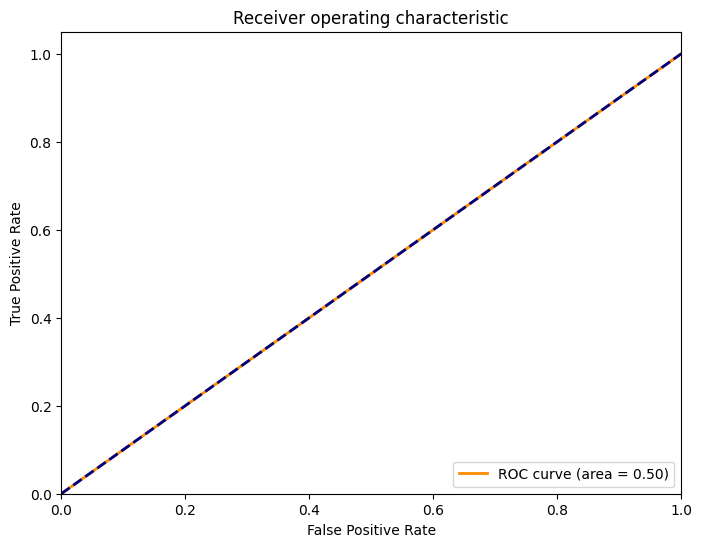

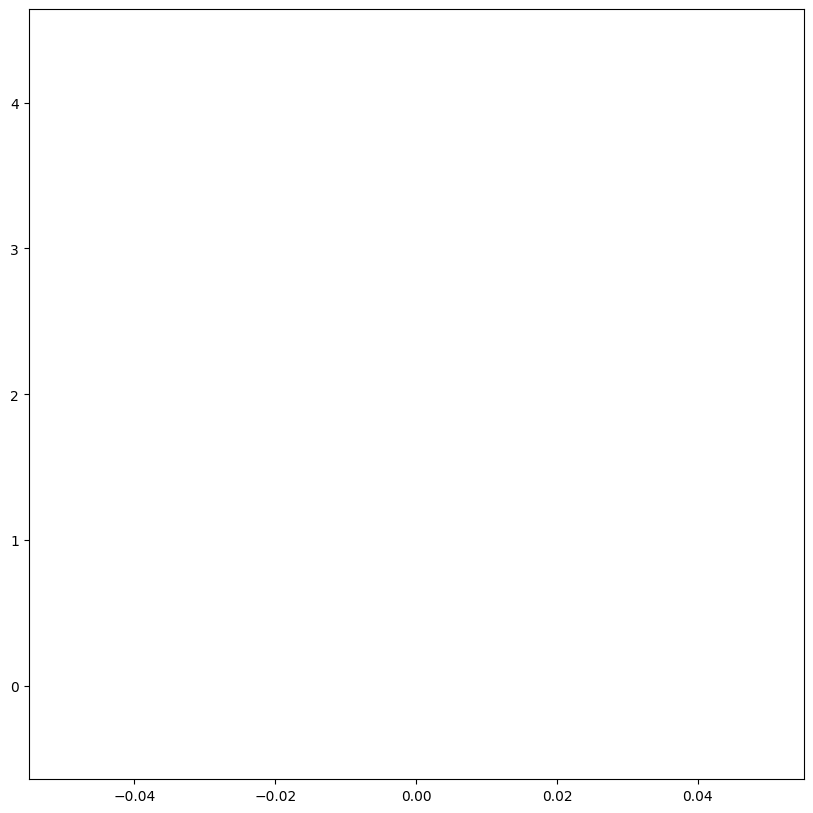

In [42]:
#Print best parameters
print(study.best_params)

#Create XGBoost Classifier with best parameters
xgbBest = XGBClassifier(**study.best_params)
xgbBest.fit(X_train, Y_train)
xgbBest_pred = xgbBest.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgbBest_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgbBest_pred))
plot_roc_curve(Y_test, xgbBest.predict_proba(X_test)[::,1])

#Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(X.columns, xgbBest.feature_importances_)
plt.show()



c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_dep

[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4719
         1.0       0.50      0.03      0.05        39

    accuracy                           0.99      4758
   macro avg       0.75      0.51      0.52      4758
weighted avg       0.99      0.99      0.99      4758

Confusion matrix:
 [[4718    1]
 [  38    1]]


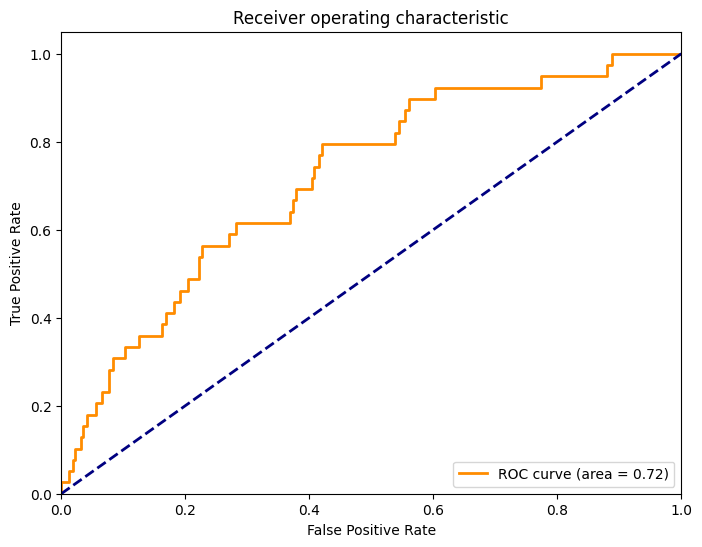

In [60]:
#Create Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rfc), ('xgb', xgb)], voting='soft')
voting_clf.fit(X_train, Y_train)
voting_pred = voting_clf.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, voting_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, voting_pred))
plot_roc_curve(Y_test, voting_clf.predict_proba(X_test)[::,1])
